# <u>**Final Project: Diabetes Health Indicators Classification </u>**
## G. Jake Manning  |  CSCA 5622 - Spring 2025 Session 1  |  [GitHub Repository](https://github.com/jman102/CSCA5622-Final-Project)

In [ ]:
#For the final project, you will identify a Supervised Learning problem to perform EDA and model analysis. A Jupyter notebook showing a supervised learning problem description, EDA procedure, analysis (model building and training), result, and discussion/conclusion. 

### Problem Description

Diabetes blah...
Ultimately this is a binary classification problem; if based on the features a person is pre-diabetic/diabetic or if they are not.

Behavioral Risk Factor Surveillance System

The objective of the BRFSS is to collect uniform, state-specific data on preventive health practices and risk
behaviors that are linked to chronic diseases, injuries, and preventable infectious diseases in the adult population.
Factors assessed by the BRFSS include tobacco use, health care coverage, HIV/AIDS knowledge or prevention,
physical activity, and fruit and vegetable consumption. Data are collected from a random sample of adults (one per
household) through a telephone survey.

### EDA Procedure

diabetes_binary_health_indicators_BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is not balanced.

To start, let's pull the CDC Diabetes Health Indicators data from the UC Irvine Machine Learning Repository. They have a super convenient module where you can fetch the data by a repo id and load features and targets straight into pandas dataframes. Most sources of data are not like this. But for a beginner project, I feel like data retrieval is not the emphasis, so I'll use the nice resources available.

In [102]:
# Import all modules that will be needed in this notebook
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, classification_report, confusion_matrix, accuracy_score
%matplotlib inline 

In [87]:
# fetch dataset | CDC Diabetes Health Indicators
# url - https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
# metadata 
# print(cdc_diabetes_health_indicators.metadata) 
  
# variable information 
print(cdc_diabetes_health_indicators.variables)

                    name     role     type      demographic  \
0                     ID       ID  Integer             None   
1        Diabetes_binary   Target   Binary             None   
2                 HighBP  Feature   Binary             None   
3               HighChol  Feature   Binary             None   
4              CholCheck  Feature   Binary             None   
5                    BMI  Feature  Integer             None   
6                 Smoker  Feature   Binary             None   
7                 Stroke  Feature   Binary             None   
8   HeartDiseaseorAttack  Feature   Binary             None   
9           PhysActivity  Feature   Binary             None   
10                Fruits  Feature   Binary             None   
11               Veggies  Feature   Binary             None   
12     HvyAlcoholConsump  Feature   Binary             None   
13         AnyHealthcare  Feature   Binary             None   
14           NoDocbcCost  Feature   Binary             

In [10]:
X.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [11]:
y.describe()

,Diabetes_binary
count,253680.000000
mean,0.139333
std,0.346294
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


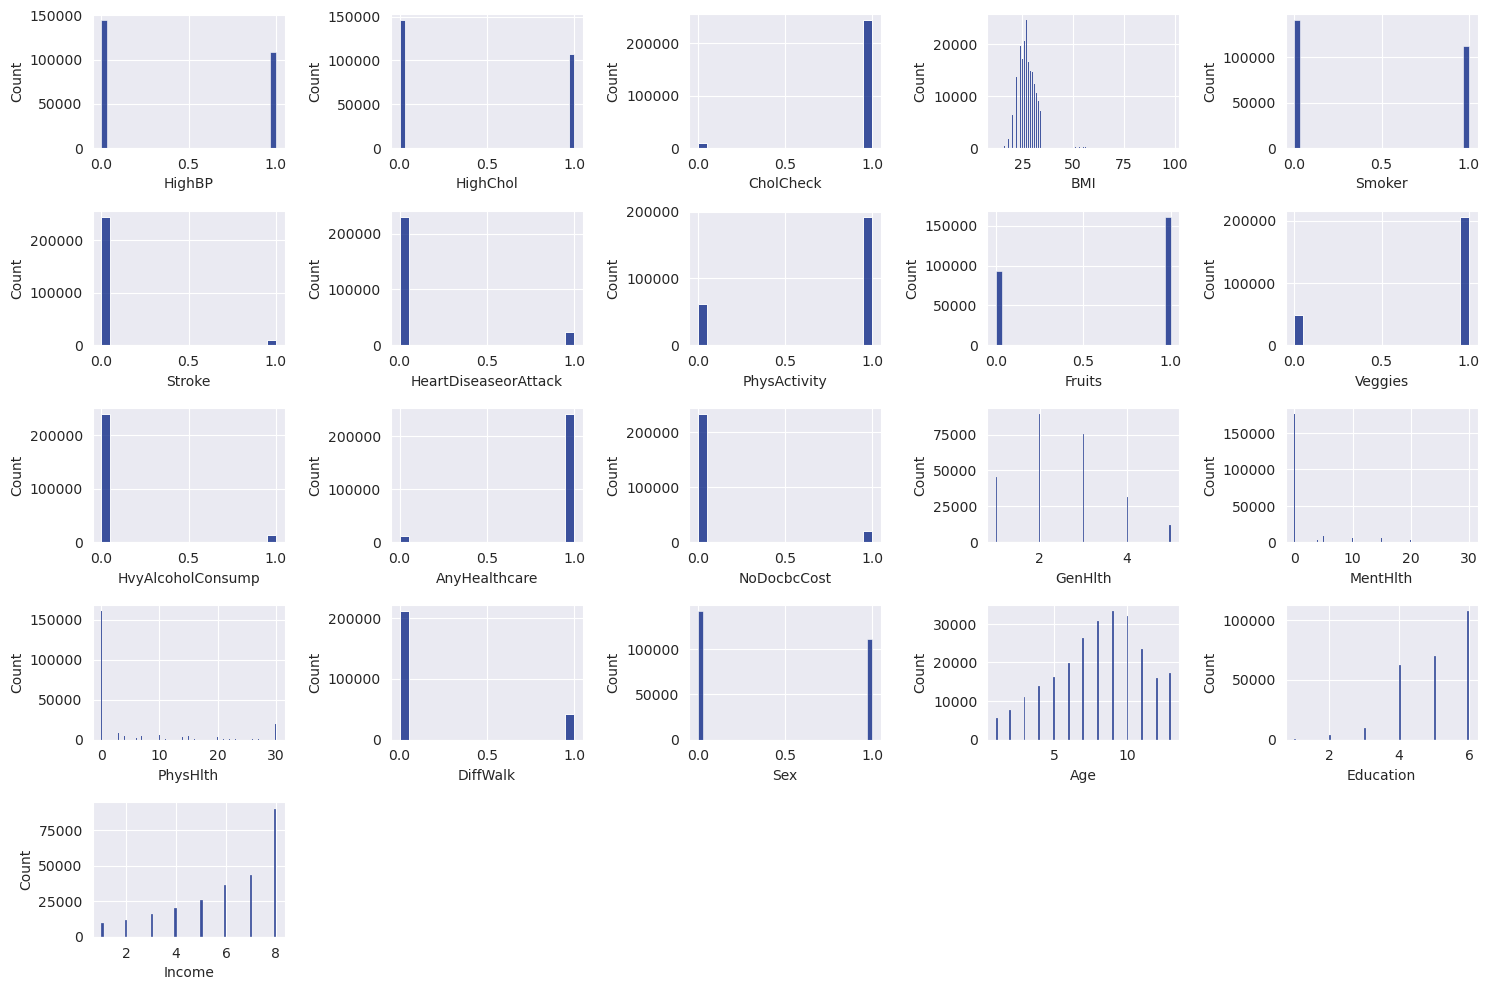

In [6]:
# Create a histogram for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(X.columns):
    plt.subplot(5, 5, i + 1)
    sns.histplot(X[feature])
    plt.tight_layout()
plt.show()

In [88]:
y = y.squeeze() # need to convert y from a dataframe to a 1-d array

### Analysis: Model Building & Training

For this classification problem, there were a handful of supervised machine learning techniques that we learned in this course that could be useful. My approach is to try a few different techniques and then compare results in later sections of this notebook. 

##### Logistic Regression Binary Classifier

In [94]:
class LR_data:
    """
    class to setup testing/training splits for Logistic Regression Classifier
    
    """
    def __init__(self):
        self.X_train = None 
        self.X_test = None 
        self.y_train = None 
        self.y_test = None
        self.y_pred = None
        self.y_prob = None
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.25)
        
lr_data = LR_data()

# logicstic regression
lr_clf = LogisticRegression(max_iter=1000).fit(lr_data.X_train, lr_data.y_train)

In [100]:
# lr_data.y_pred = lr_clf.predict(lr_data.X_test)
# lr_clf.coef_

##### Random Forest Binary Classifier

In [99]:
class RF_data:
    """
    class to setup testing/training splits for Logistic Regression Classifier
    
    """
    def __init__(self):
        self.X_train = None 
        self.X_test = None 
        self.y_train = None 
        self.y_test = None
        self.y_pred = None
        self.y_prob = None
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.25)
        
rf_data = RF_data()

# random forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42).fit(rf_data.X_train, rf_data.y_train)

### Results

##### Logistic Regression Results

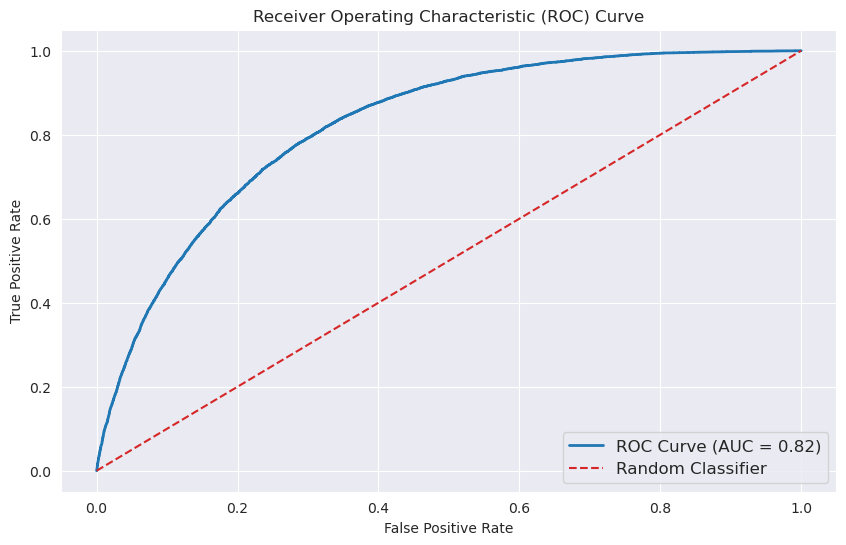

In [107]:
# logistic regression results
lr_data.y_prob = lr_clf.predict_proba(lr_data.X_test)[:, 1]

#get false positive rate (fpr), true positive rate (tpf)
fpr, tpr, _ = roc_curve(lr_data.y_test, lr_data.y_prob)

# find area under cureve for roc curve
auc = roc_auc_score(lr_data.y_test, lr_data.y_prob)

# plot
plt.close()
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='tab:blue', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='tab:red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(fontsize='large', loc='lower right')
plt.grid(True)
plt.show()
# plot Precision-Recall Curve
# prec, rec, thr = precision_recall_curve(lr_data.y_test, lr_data.y_prob)
# plt.figure(figsize=(10,6))
# plt.plot(rec, prec, color='tab:blue', lw=2)
# plt.fill_between(rec, prec, color='tab:blue', alpha=0.2)
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve')
# plt.grid(True)
# plt.show()

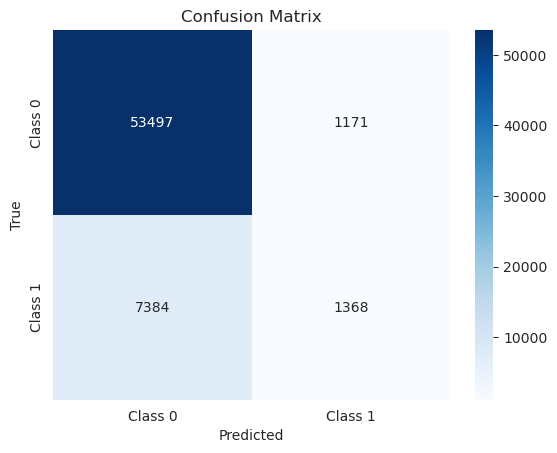

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     54668
           1       0.54      0.16      0.24      8752

    accuracy                           0.87     63420
   macro avg       0.71      0.57      0.58     63420
weighted avg       0.83      0.87      0.83     63420



In [105]:
lr_data.y_pred = lr_clf.predict(lr_data.X_test)

# Confusion Matrix
cm = confusion_matrix(lr_data.y_test, lr_data.y_pred)

# Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(lr_data.y_test, lr_data.y_pred))

##### Random Forest Results

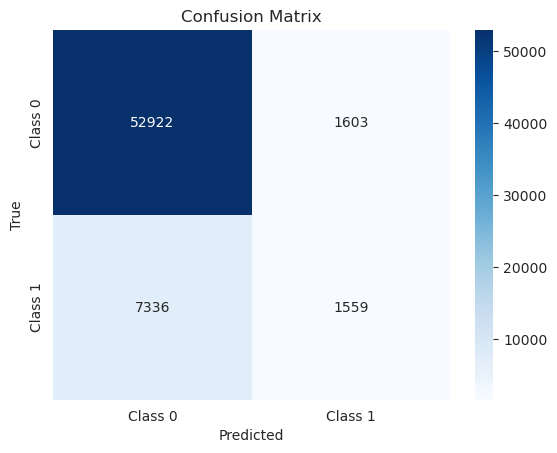

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     54525
           1       0.49      0.18      0.26      8895

    accuracy                           0.86     63420
   macro avg       0.69      0.57      0.59     63420
weighted avg       0.82      0.86      0.83     63420



In [106]:
rf_data.y_pred = rf_clf.predict(rf_data.X_test)

# Confusion Matrix
cm = confusion_matrix(rf_data.y_test, rf_data.y_pred)

# Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(rf_data.y_test, rf_data.y_pred))

##### Hyperparameter Tuning

In [113]:

# # Hyperparameter grid
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Grid Search
# grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3)
# grid_search.fit(rf_data.X_train, rf_data.y_train)

# # Best parameters
# print(f"Best parameters: {grid_search.best_params_}")

# # Best model
# best_rf = grid_search.best_estimator_

# # Evaluate the best model on the test set
# y_pred_best = best_rf.predict(rf_data.X_test)
# print("Best Model Evaluation:")
# print(classification_report(rf_data.y_test, y_pred_best))

### Conclusions

### Sources

[UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators)

[Kaggle Project](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data?select=diabetes_012_health_indicators_BRFSS2015.csv)

[Original Dataset Source](https://www.kaggle.com/datasets/cdc/behavioral-risk-factor-surveillance-system)